### Run this code to import the libraries we will need.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import io



# CS 48A Pandas Lab
## by Joanna Lankester, PhD

### Directions:
- Work through the exercises. Blocks with a * require an answer (either *Code, *Response which you can leave in the comments, or both).
- Be sure to generally run cells from the top to the bottom of the notebook, because some code will be dependent on earlier code.
- When you have all your code how you want it, re-run everything from the top sequentially before turning it in. You can use the "Run all" option from the menus, if you want.
- Turn in the .ipynb file. If you are working in Google Colaboratory, go to File - Download .ipynb to get the file.

# Part A

In this section, we will practice:
- extracting columns by name
- split, apply, (combine)
- plotting a distribution
- converting a Series to a DataFrame

And we will learn something new about:
- converting data types
- looking up pandas API documentation
- resetting the index
- renaming columns
- using the inplace option

Be sure that you have downloaded ramen-ratings.csv to your computer before starting.

#### 0. Alternative for running locally
If you are running on Google Colab, DO NOT run or modify item 0. Proceed to item 1.

If you are running locally rather than in Google Colab, run item 0, then skip items 1-2 and start at item 3. Do not change item 0. Instead, keep the ramen-ratings.csv data at the necessary relative path.

In [ ]:
# 0. alternative for 1-2. Do not change this cell.
# Don't comment this out! Don't do anything to change this cell.
# If you don't need this code, simply go to the next one without running it.
#ramen = pd.read_csv('data/ramen-ratings.csv')
# Notice we have printed the dataframe value by putting the word ramen last in the cell.
# (This prints the first and last 5 lines of the dataframe.)
ramen

FileNotFoundError: ignored

#### 1-2. Alternative for running on Google Colab

Use 1-2 if running in Google Colab. Skip them if you are running locally on your computer.

In [2]:
# 1. Run this cell and upload the ramen-ratings.csv file from your computer
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving ramen-ratings.csv to ramen-ratings.csv
User uploaded file "ramen-ratings.csv" with length 158316 bytes


In [3]:
 # 2. Run this cell to get the uploaded file into a data frame.
# Notice we have printed the dataframe value by putting the word ramen last in the cell.
# (This prints the first and last 5 lines of the dataframe.)
ramen = pd.read_csv(io.StringIO(uploaded['ramen-ratings.csv'].decode('utf-8')))
ramen

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN
...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,NaN
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1,NaN
2577,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2,NaN
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2,NaN


<!-- BEGIN QUESTION -->

#### 3. (a) (*Code)

Quick review of column subsetting and data types:
Extract and print only the Variety and Country columns from the ramen dataset.

Enter your code in the cell below creating a new data frame called Q3:

In [4]:
Q3 = ramen[['Variety', 'Country']]

Q3

,Variety,Country
0,T's Restaurant Tantanmen,Japan
1,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Taiwan
2,Cup Noodles Chicken Vegetable,USA
3,GGE Ramen Snack Tomato Flavor,Taiwan
4,Singapore Curry,India
...,...,...
2575,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Vietnam
2576,Oriental Style Instant Noodles,Thailand
2577,Tom Yum Shrimp,Thailand
2578,Tom Yum Chili Flavor,Thailand


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### 3. (b) (*Response)

Answer this question: is the result a DataFrame or a Series, and how do you know? (Note: Double click on the prompt below to replace the text with your answer.)

Data frame because two columns ramen =[["Variety", "Country"]] is syntax for dataframes.

<!-- END QUESTION -->

## Convert data types and plot the distribution of ramen ratings

<!-- BEGIN QUESTION -->

#### 4. (*Response)
Run the describe function below to see a summary of the data. Compare it to the printed DataFrame above.
Which columns did you expect to be numeric? Which ones are actually numeric?
(You can double check your answer in the next cell.)

In [5]:
ramen.describe()

,Review #
count,2580.000000
mean,1290.500000
std,744.926171
min,1.000000
25%,645.750000
50%,1290.500000
75%,1935.250000
max,2580.000000


I expected stars and reviews to be numeric. Reviews is actually generic.

<!-- END QUESTION -->

#### 5.
Run the following code to see what the data types are of each column in the DataFrame.

In [6]:
ramen.dtypes

Review #     int64
Brand       object
Variety     object
Style       object
Country     object
Stars       object
Top Ten     object
dtype: object

As we can see, the Stars variable is not numeric. We need it to be numeric so we can do things like plot the value of the number of stars for each type of raman.

<!-- BEGIN QUESTION -->

#### 6. (*Response)
Uncomment and run the following line of code to attempt to convert the column to a numeric one. It will not work.


In [ ]:
#pd.to_numeric(ramen['Stars'])

Answer the question: based on the error, why doesn't this work?
(ask more in the Slack channel if you're not sure)

(To remove this error after answering, re-comment the line of code and re-run the cell.)

One of the stars ratings is unrated and therefore can't be intaken by the method.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### 7. (*Code)
To convert to numeric, we need to tell pandas what to do if the value cannot be converted to a numeric value, for example if the value is "Unrated". Look at this documentation and select the option to convert non-numeric items to a NaN or missing value.
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html
Hint: it will look like this:
pd.to_numeric(ramen['Stars'],errors='some option here')

Enter your code in the cell below:

In [7]:
pd.to_numeric(ramen['Stars'],errors='coerce')

0       3.75
1       1.00
2       2.25
3       2.75
4       3.75
        ... 
2575    3.50
2576    1.00
2577    2.00
2578    2.00
2579    0.50
Name: Stars, Length: 2580, dtype: float64

<!-- END QUESTION -->

#### 8. (*Code)
Once the line above works and gives you a Series output, save to a new column in the data frame called "rating".
Hint: See "Adding a column" in the tutorial

Enter your code in the cell below:

In [8]:
ramen['rating'] = pd.to_numeric(ramen['Stars'], errors='coerce')

<!-- BEGIN QUESTION -->

#### 9. (*Response)
Run the describe command below to see what the updated numeric variables are like.

In [9]:
ramen.describe()

,Review #,rating
count,2580.000000,2577.000000
mean,1290.500000,3.654676
std,744.926171,1.015331
min,1.000000,0.000000
25%,645.750000,3.250000
50%,1290.500000,3.750000
75%,1935.250000,4.250000
max,2580.000000,5.000000


Answer the question: From the describe output, how many values of Stars were missing?
Assume every row has a "Review #" identification.


3.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### 10. (*Code)
Use seaborn to plot a histogram of the ramen ratings with 10 bins.
Hint: If you are running this with the latest version of seaborn, use histplot.

Enter your code in the cell below:

<Axes: title={'center': 'Most Ramens have A Rating of 3 or More'}, xlabel='Rating', ylabel='Count'>

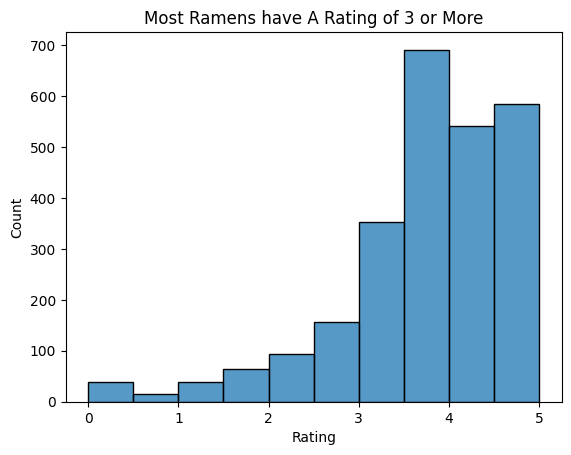

In [12]:
from matplotlib import axis
ax = sns.histplot(data=ramen, x="rating", bins=10)

ax.set_title("Most Ramens have A Rating of 3 or More")
ax.set_xlabel("Rating")
ax.set_ylabel('Count')
ax


<!-- END QUESTION -->

Notice that was a fair bit of work just to get a histogram of the ramen ratings. Welcome to data science -- sometimes it seems like most of your time is spent just cleaning up the data!

That said, cleaning the data gets faster, and it can also be a fun challenge.

## Create a table of the number of varieties of ramen for each country

<!-- BEGIN QUESTION -->

#### 11. (*Code)
Write a line of code to find out how many ratings there are for each Country. There are two ways to do this; choose either one.

Note: For practice, create this as a **Series**, not as a **DataFrame**.

[SPOILER ALERT] Hints below, skip to writing code if you don't want to see them yet.

Hints for option A (split-apply-combine):
- when the question says "for each", we want one row for each of that variable, so we need to group by that variable.
- Which column do we want? Recall the syntax difference for a **Series** vs **DataFrame**.
- We want to find out how many, so apply the .count() function.

Hints for option B:
- Consider that Country is a nominal categorical variable.
- From the tutorial, how do you count the number of times each value of a categorial variable has appeared in a DataFrame?

Enter your code in the cell below:

In [13]:
count_by_countries_series = ramen['Country'].value_counts()
count_by_countries_series


Japan            352
USA              323
South Korea      309
Taiwan           224
Thailand         191
China            169
Malaysia         156
Hong Kong        137
Indonesia        126
Singapore        109
Vietnam          108
UK                69
Philippines       47
Canada            41
India             31
Germany           27
Mexico            25
Australia         22
Netherlands       15
Myanmar           14
Nepal             14
Pakistan           9
Hungary            9
Bangladesh         7
Colombia           6
Brazil             5
Cambodia           5
Fiji               4
Holland            4
Poland             4
Finland            3
Sarawak            3
Sweden             3
Dubai              3
Ghana              2
Estonia            2
Nigeria            1
United States      1
Name: Country, dtype: int64

In [ ]:
...

<!-- END QUESTION -->

#### 12. Notice that there are both United States and USA listed.
Correct it by running the following line of code:

In [14]:
ramen['Country'] = ramen['Country'].str.replace('USA','United States')

#### 13. (*Code)
With the data cleaned, re-run the code you wrote 2 cells up giving the number of counts per country, saving it to a variable called *count_by_countries_series*. Print the variable name to check it.
Notice this gives us a Series, not a DataFrame.

Enter your code in the cell below:

In [15]:
count_by_countries_series = ramen['Country'].value_counts()
count_by_countries_series

Japan            352
United States    324
South Korea      309
Taiwan           224
Thailand         191
China            169
Malaysia         156
Hong Kong        137
Indonesia        126
Singapore        109
Vietnam          108
UK                69
Philippines       47
Canada            41
India             31
Germany           27
Mexico            25
Australia         22
Netherlands       15
Nepal             14
Myanmar           14
Hungary            9
Pakistan           9
Bangladesh         7
Colombia           6
Cambodia           5
Brazil             5
Poland             4
Holland            4
Fiji               4
Sweden             3
Sarawak            3
Finland            3
Dubai              3
Ghana              2
Estonia            2
Nigeria            1
Name: Country, dtype: int64

<!-- BEGIN QUESTION -->

#### 14. (*Code)
We need a DataFrame instead of a Series from the prior cell.
Copy and paste your code from the previous block, and convert it to a data frame by enclosing the right side of the = sign in the parentheses of this expression: pd.DataFrame()

Save the output to a DataFrame called count_by_countries.
Again print the value to check.
In other words, it should look like this:

count_by_countries = pd.DataFrame(copied code from question 13)

Note for those with CS backgrounds: this is the DataFrame constructor.

Enter your code in the cell below:

In [16]:
...
count_by_countries = pd.DataFrame(ramen['Country'].value_counts())
count_by_countries

,Country
Japan,352
United States,324
South Korea,309
Taiwan,224
Thailand,191
China,169
Malaysia,156
Hong Kong,137
Indonesia,126
Singapore,109


<!-- END QUESTION -->

Notice that the output is a bit strange: the country is in bold, and depending on the strategy you chose above, the count may be labeled "Country". Earlier in this lab, we learned that the index of a row is not necessarily the row number; it is really a row identifier. We converted one of the columns to a row identifier, or index, using set_index().

Here we're in the opposite situation: the index contains the information that we actually want in a column. We will convert the index to a column using reset_index().

#### 15.
Run the following code.

In [17]:
count_by_countries.reset_index()

,index,Country
0,Japan,352
1,United States,324
2,South Korea,309
3,Taiwan,224
4,Thailand,191
5,China,169
6,Malaysia,156
7,Hong Kong,137
8,Indonesia,126
9,Singapore,109


#### 16.
Now run the name of the dataframe to see if it is updated:

In [18]:
count_by_countries

,Country
Japan,352
United States,324
South Korea,309
Taiwan,224
Thailand,191
China,169
Malaysia,156
Hong Kong,137
Indonesia,126
Singapore,109


#### 17.
We see that reset_index() showed us what a copy of the DataFrame would look like if we used the function, but it did not save changes to the DataFrame.
To save changes, we'll add this in between the parentheses: inplace=True. Keep this in mind; this option for inplace occurs in many other pandas methods as well.
Run the following code.

In [19]:
count_by_countries.reset_index(inplace=True)
count_by_countries

,index,Country
0,Japan,352
1,United States,324
2,South Korea,309
3,Taiwan,224
4,Thailand,191
5,China,169
6,Malaysia,156
7,Hong Kong,137
8,Indonesia,126
9,Singapore,109


#### 18.
Depending on how you counted the number of ratings per country, the column names may now be off. Let's rename them appropriately so we can all work from the same point.
Run the following code to fix it and check:

In [20]:
count_by_countries.columns = ['Country', 'count']
count_by_countries


,Country,count
0,Japan,352
1,United States,324
2,South Korea,309
3,Taiwan,224
4,Thailand,191
5,China,169
6,Malaysia,156
7,Hong Kong,137
8,Indonesia,126
9,Singapore,109


# Part B

In this section, we'll look at:
- Merging (i.e. joining) two data frames
- Another split-apply-combine example
- Ordering a bar plot by values

## Extract data for the countries that make the most ramen and create a barplot

Suppose we want to take a closer look at only the countries that produce a lot of raman. Let's filter out the countries that have > 100 ramen ratings.

There are probably many ways to do this, and you are welcome to think up your  own, if you wish. I will walk you through one.

#### 19. (*Code)
Now use row selection to select all lines where the count is greater than 100.
Save this to a variable called ramen_countries. (i.e. ramen_countries will be a new DataFrame.)
Hint: If you aren't sure where to start, do this one step at a time similar to the pandas tutorial or the steps in the Pandas part 1 lab.

Enter your code in the cell below:

In [33]:
filter_countries = ramen.groupby('Country').filter(lambda x: len(x) > 100)
ramen_countries = filter_countries['Country'].value_counts().rename("count").reset_index()
ramen_countries.columns = ['Country', 'count']
ramen_countries


,Country,count
0,Japan,352
1,United States,324
2,South Korea,309
3,Taiwan,224
4,Thailand,191
5,China,169
6,Malaysia,156
7,Hong Kong,137
8,Indonesia,126
9,Singapore,109


<!-- BEGIN QUESTION -->

#### 20. (*Code)
Join this data frame with the original data frame to retain only countries with more than 100 ramen varieties.
We will put ramen on the left and ramen_countries on the right, like this:
ramen.merge(ramen_countries,how='  ',on='  ')
You will determine what goes into each of those quotations.

- How: if we only want the rows from the countries in ramen_countries, how should we do this join? Options: inner, outer, left, right (2 options will work, choose either one)
- On: Which column name is in common between these datasets that we want to use to tell pandas how to join the data?

Figure out the answers to those questions, and then update the following line of code:

ramen_top_countries = ramen.merge(ramen_countries,how='fill this in',on='fill this in')

In [26]:
ramen_top_countries = ramen.merge(ramen_countries,how='inner',on='Country')
ramen_top_countries

,Review #,Brand,Variety,Style,Country,Stars,Top Ten,rating,count
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN,3.75,352
1,2574,Acecook,Spice Deli Tantan Men With Cilantro,Cup,Japan,4,NaN,4.00,352
2,2573,Ikeda Shoku,Nabeyaki Kitsune Udon,Tray,Japan,3.75,NaN,3.75,352
3,2572,Ripe'n'Dry,Hokkaido Soy Sauce Ramen,Pack,Japan,0.25,NaN,0.25,352
4,2567,Nissin,Deka Buto Kimchi Pork Flavor,Bowl,Japan,4.5,NaN,4.50,352
...,...,...,...,...,...,...,...,...,...
2200,133,Baijia,Hot & Sour Rice Noodle,Pack,China,0,NaN,0.00,169
2201,90,Long Kow,Crystal Noodle Six Kinds Of Mushrooms,Pack,China,2.3,NaN,2.30,169
2202,69,Baijia,Spicy Fei- Chang Sweet Potato Noodle,Pack,China,1.75,NaN,1.75,169
2203,55,Hua Feng Noodle Expert,Favoury Pork Flavor,Pack,China,1,NaN,1.00,169


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### 21. (\*Code)
Check your work by writing a line of code summing the count of ramen_countries.
This number should match (or almost match) the number of rows above.

Enter your code in the cell below:

In [27]:
sum = ramen_countries.sum()
sum

Country    JapanUnited StatesSouth KoreaTaiwanThailandChi...
count                                                   2205
dtype: object

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### 22. (*Code)
Use the seaborn barplot command to make a bar plot of rating by country from the ramen_top_countries data.
Choose the best orientation of x vs y so that you can read the labels.
Also include the option errorbar=None in the parentheses.

Don't bother adding titles and labels, as we will improve the plot first.

Enter your code in the cell below:

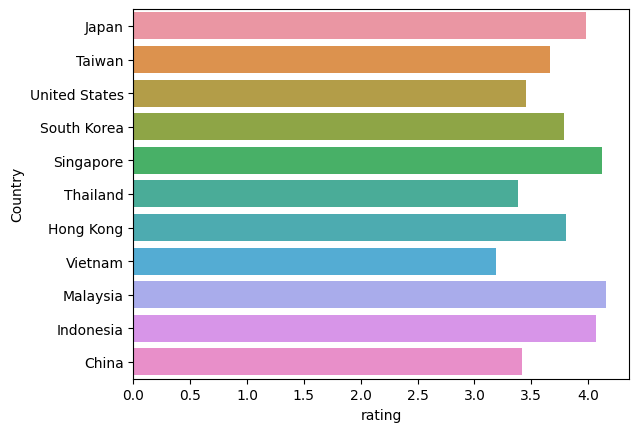

In [28]:
ax= sns.barplot(x='rating', y='Country', data=ramen_top_countries, errorbar=None)

<!-- END QUESTION -->

## Use a split-apply-combine to refactor data to order plot

#### 23.
We would prefer to have this ordered. We want to get a DataFrame with the country, rating, and (for later use) count.

[SPOILER ALERT] if you want to figure this out yourself, don't keep reading this cell. Otherwise, let's walk through this together.

We want one line per country, so group by country like this: \
*ramen_top_countries.groupby("Country")*

Here's an option that prevents the need for all the index resetting: \
*ramen_top_countries.groupby("Country",as_index=False)*

We want the rating and count for each country, so select those columns. Remember that we need two sets of brackets to select multiple columns, because the inner brackets are giving the list of columns. \
*ramen_top_countries.groupby("Country",as_index=False)[['rating','count']]*

We want the mean rating for each country. (We want the actual count, but that value is already repeated in every row, so the mean of all the same number will just be that number.) Apply the mean function to the code so far. \
*ramen_top_countries.groupby("Country",as_index=False)[['rating','count']].mean()*

Make this a DataFrame.

Run this and check the result.

In [29]:
pd.DataFrame(ramen_top_countries.groupby("Country",as_index=False)[['rating','count']].mean())

,Country,rating,count
0,China,3.421893,169.0
1,Hong Kong,3.801825,137.0
2,Indonesia,4.067460,126.0
3,Japan,3.981605,352.0
4,Malaysia,4.154194,156.0
5,Singapore,4.126147,109.0
6,South Korea,3.790554,309.0
7,Taiwan,3.665402,224.0
8,Thailand,3.384817,191.0
9,United States,3.457948,324.0


#### 24.
Now sort this by the rating. We want it descending, so we'll set ascending to False.
Save this as ramen_rating_by_country.
Run the following code.

In [30]:
ramen_rating_by_country = pd.DataFrame(ramen_top_countries.groupby("Country",as_index=False)[['rating','count']].mean()).sort_values('rating',ascending=False)
ramen_rating_by_country

,Country,rating,count
4,Malaysia,4.154194,156.0
5,Singapore,4.126147,109.0
2,Indonesia,4.067460,126.0
3,Japan,3.981605,352.0
1,Hong Kong,3.801825,137.0
6,South Korea,3.790554,309.0
7,Taiwan,3.665402,224.0
9,United States,3.457948,324.0
0,China,3.421893,169.0
8,Thailand,3.384817,191.0


<!-- BEGIN QUESTION -->

#### 25. (*Code)
Create a barplot of country vs. rating using ramen_rating_by_country.
Add a title.

Enter your code in the cell below:

<ipython-input-48-463a503a3be7>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax=sns.barplot(x='rating', y='Country', data=ramen_rating_by_country, ci=None)


Text(0.5, 1.0, 'Countries with 100+ Raman Varieties Have 3+ Raman Rating')

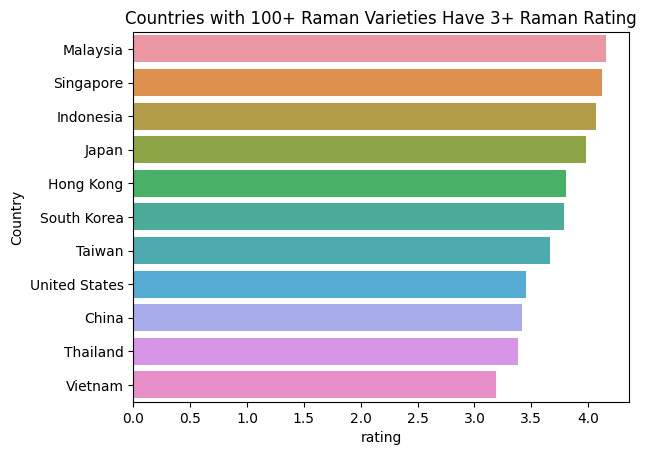

In [48]:
ax=sns.barplot(x='rating', y='Country', data=ramen_rating_by_country, ci=None)
ax.set_title('Countries with 100+ Raman Varieties Have 3+ Raman Rating')

<!-- END QUESTION -->

## Create and interpret a scatterplot

<!-- BEGIN QUESTION -->

#### 26. (*Code)
Use regplot to create a scatterplot of rating vs. count, which is essentially quality vs. quantity. Regplot will automatically apply a best-fit line.

Enter your code in the cell below:

<Axes: title={'center': 'Quality vs. Quantity'}, xlabel='Count', ylabel='Rating'>

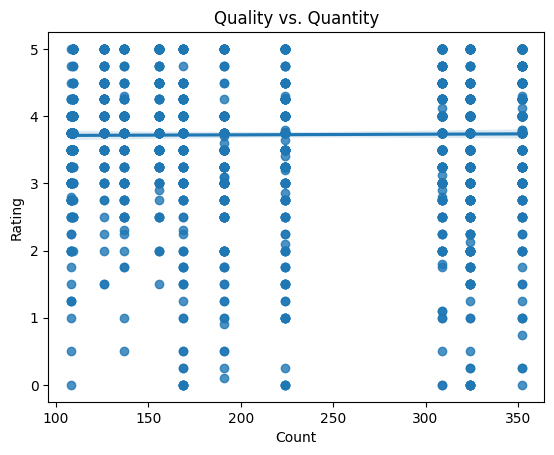

In [32]:

ax= sns.regplot(x='count', y='rating', data=ramen_top_countries)
ax.set_xlabel('Count')
ax.set_ylabel('Rating')
ax.set_title('Quality vs. Quantity')
ax


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### 27. (*Response)
Based on the plot above, is there a quality vs. quantity tradeoff?
In other words, does the mean rating seem to be related to the number of types of ramen that the country produces?
(Consider the correlation of these variables, or the algebra of the best-fit line.)

No, the mean rating does not seem to be related to the number of types of raman that a country produces.

<!-- END QUESTION -->

# Part C: short answer

(*Response)
Answer the following short questions based on things completed or shown earlier in this lab:


<!-- BEGIN QUESTION -->

#### 28. (*Response)
How can you get the data type of each column of a DataFrame in one line of code?

By using the .dtypes method. If the data frame is called df then df.dtypes will do this.


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### 29. (*Response)
Which function allows you to quickly see several summary statistics of all numeric columns in a DataFrame?

The describe method.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### 30. (*Response)
Which keyword is used to make a lasting change in a DataFrame, rather than simply modifying a temporary copy?

Clarification: in the context of using something like drop, reset_index, or set_index

inplace=True

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### 31. (*Response)
Suppose an Index of a DataFrame has information that you actually need in a column instead. Which function moves the Index to a column and instead makes a new Index that numbers the rows?

.reset_index()


<!-- END QUESTION -->

# Part D: Putting it all together

You've learned quite a few operations in Pandas now - exciting! Let's put together what we've covered in Pandas for the following exercises to demonstrate these skills. Please see the Canvas lab page for hints as needed.

Important: for these exercises, do not hard code row numbers. (i.e., The solutions should work on another similar data set.)

All of these answers will be tables (i.e. no plots).

#### 32.
You have been given a DataFrame from this data. Run this cell to load the data.

In [34]:
#**Do not change this cell!
d = {'category':['citrus','flower','flower','succulent','flower','citrus','vegetable','vegetable','succulent'],\
     'num_in_stock':[19,14,23,30,144,10,345,26,27],\
     'edible':[True,False,True,False,False,True,True,True,False],\
     'decorative': [False,True,True,True,True,False,False,True,True],\
     'unneeded':[3.44,-4.56,3.26,7.32,79.234,-453,445,995,0.48]}
plants = pd.DataFrame(d,index=['Lemon','Camelia','Lavender','Jade','Rose','Lime','Tomato','Flowering Kale','Aeonium Sunburst'])
plants

,category,num_in_stock,edible,decorative,unneeded
Lemon,citrus,19,True,False,3.440
Camelia,flower,14,False,True,-4.560
Lavender,flower,23,True,True,3.260
Jade,succulent,30,False,True,7.320
Rose,flower,144,False,True,79.234
Lime,citrus,10,True,False,-453.000
Tomato,vegetable,345,True,False,445.000
Flowering Kale,vegetable,26,True,True,995.000
Aeonium Sunburst,succulent,27,False,True,0.480


#### 33.
Run this to see the data types of the columns of this data frame.

In [35]:
plants.dtypes

category         object
num_in_stock      int64
edible             bool
decorative         bool
unneeded        float64
dtype: object

<!-- BEGIN QUESTION -->

#### 34. (*Code)
One column is not needed (and named "unneeded"). Permanently remove
this column from the plants data without including the code "plants =..."

** Hints on Canvas

In [39]:
plants.drop("unneeded", axis=1, inplace=True)
plants

,category,num_in_stock,edible,decorative
Lemon,citrus,19,True,False
Camelia,flower,14,False,True
Lavender,flower,23,True,True
Jade,succulent,30,False,True
Rose,flower,144,False,True
Lime,citrus,10,True,False
Tomato,vegetable,345,True,False
Flowering Kale,vegetable,26,True,True
Aeonium Sunburst,succulent,27,False,True


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### 35. (*Code)
Get the entire row only for plants that are both edible and decorative. Save the resulting DataFrame to a variable called "edible_and_decorative".

** Hints on Canvas

In [40]:

edible_and_decorative = plants[(plants['edible'] == True) & (plants['decorative'] == True)]
edible_and_decorative

,category,num_in_stock,edible,decorative
Lavender,flower,23,True,True
Flowering Kale,vegetable,26,True,True


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### 36. (*Code)
Display the total number of plants in stock for each category using the plants dataframe.

** Hints on Canvas

In [43]:
stock_by_category = plants.groupby('category')['num_in_stock'].sum()
stock_by_category

category
citrus        29
flower       181
succulent     57
vegetable    371
Name: num_in_stock, dtype: int64

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### 37. (*Code)
Get the total number of plants in stock in the plants dataframe for the plant names that start with "L" (let's call this "num_L_plants").
This one is a challenge - see multiple hints on Canvas, and ask on Slack if you have
any questions.
This may be easiest to do using multiple lines of code.
You are aiming to get a single number.

** Hints on Canvas

In [46]:
filtered_plants = plants[plants.index.str.startswith('L')]
num_L_plants = filtered_plants['num_in_stock'].sum()
num_L_plants

52

<!-- END QUESTION -->

# Wrapping up

You're done! Nice work on this.
Check that all the questions have been answered, and please check that the cells with questions 0 and 32 have not been changed at all.